<a href="https://colab.research.google.com/github/Prattoypaul/deeplearning/blob/machinel/Convulutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [10]:
!nvidia-smi

Sat Jul 17 16:57:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
datadir='/content/drive/MyDrive/Colab Notebooks/deeplearning/ani/DMLab/Animals dataset'

In [13]:
cat=['cane','cavallo','elefante','farfalla','gallina','gatto']

In [14]:
import matplotlib.image as mpimg
import os
import cv2

In [15]:
img_size=[224,224]

In [16]:
img_shape=(224,224)

In [17]:
data=[]
for cats in cat:
  folder=os.path.join(datadir,cats)
  label=cat.index(cats)
  for img in os.listdir(folder):
    image=os.path.join(folder,img)
    image_array=cv2.imread(image)

    
    image_array=cv2.resize(image_array,img_shape,interpolation=cv2.INTER_AREA)
    data.append([image_array,label])

In [18]:
from tensorflow import keras

In [19]:
data_augmentation=keras.Sequential([
                                    layers.experimental.preprocessing.RandomFlip(),
                                    layers.experimental.preprocessing.RandomRotation(0.1),
                                    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [25]:
import random
random.shuffle(data)
x=[]
y=[]
for f, l in data:
  x.append(f)
  y.append(l)
x=np.array(x)
y=np.array(y)
x=x/255

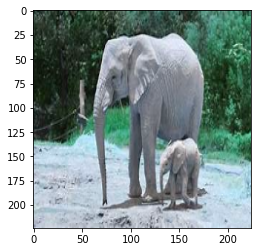

In [26]:
plt.imshow(x[2])

In [27]:
y[2]

2

In [29]:
def plot_labal(x,y,i):
  plt.imshow(x[i])
  plt.xlabel(cat[y[i]])

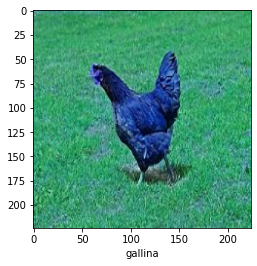

In [30]:
plot_labal(x,y,7)

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
cnn=models.Sequential([
                       data_augmentation,
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
                       layers.MaxPool2D((2,2)),
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                       layers.MaxPool2D((2,2)),
                       layers.Flatten(),
                       layers.Dense(1000,activation='relu'),
                       layers.Dense(6,activation='softmax')
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
cnn.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
28/28 [==============================] - 35s 98ms/step - loss: 8.8495 - accuracy: 0.2839
Epoch 2/50
28/28 [==============================] - 2s 85ms/step - loss: 1.5800 - accuracy: 0.4140
Epoch 3/50
28/28 [==============================] - 2s 85ms/step - loss: 1.4338 - accuracy: 0.4457
Epoch 4/50
28/28 [==============================] - 2s 85ms/step - loss: 1.4772 - accuracy: 0.4412
Epoch 5/50
28/28 [==============================] - 2s 86ms/step - loss: 1.3340 - accuracy: 0.5079
Epoch 6/50
28/28 [==============================] - 2s 85ms/step - loss: 1.3276 - accuracy: 0.4921
Epoch 7/50
28/28 [==============================] - 2s 85ms/step - loss: 1.2841 - accuracy: 0.5045
Epoch 8/50
28/28 [==============================] - 2s 85ms/step - loss: 1.2934 - accuracy: 0.5215
Epoch 9/50
28/28 [==============================] - 2s 85ms/step - loss: 1.2408 - accuracy: 0.5283
Epoch 10/50
28/28 [==============================] - 2s 85ms/step - loss: 1.1692 - accuracy: 0.5633
Epoch 11

In [34]:
cnn.evaluate(xtest,ytest)

12/12 [==============================] - 1s 47ms/step - loss: 1.8092 - accuracy: 0.5567


[1.8092163801193237, 0.5567282438278198]

In [37]:
ypred=cnn.predict(xtest)
ypred=[np.argmax(i) for i in ypred]

In [38]:
from sklearn.metrics import classification_report ,confusion_matrix

In [39]:
print('Classification Report \n',classification_report(ytest,ypred))

Classification Report 
               precision    recall  f1-score   support

           0       0.29      0.20      0.23        51
           1       0.41      0.32      0.36        38
           2       0.35      0.45      0.39        42
           3       0.65      0.80      0.72        51
           4       0.57      0.60      0.59        88
           5       0.73      0.70      0.71       109

    accuracy                           0.56       379
   macro avg       0.50      0.51      0.50       379
weighted avg       0.55      0.56      0.55       379

